# Dynamic Resonances

This notebook shows how to obtain dynamic resonances from the discrete resonance spectrogram of a signal.

## 1. Imports

First we import the library of functions.

In [1]:
from utilities_store import *

## 2. Obtain spectrogram of the signal

First we obtain the spectrogram of the signal.

In [2]:
spectrogram, signal = get_spectrogram('sine440.wav', N = 500, step_size = 250, 
                                          power_threshold = 1e-9, amp_threshold = 1e-8)

Progress: 0.00%
Progress: 5.67%
Progress: 11.34%
Progress: 17.01%
Progress: 22.68%
Progress: 28.34%
Progress: 34.01%
Progress: 39.68%
Progress: 45.35%
Progress: 51.02%
Progress: 56.69%
Progress: 62.36%
Progress: 68.03%
Progress: 73.70%
Progress: 79.37%
Progress: 85.03%
Progress: 90.70%
Progress: 96.37%


/Users/nastysushi/Mirror/_MULTIMEDIA/THESIS/thesis/github/fpt/fpt.py:224: RuntimeWarning: overflow encountered in power
  Z = np.power(self.zs.reshape(-1, 1), exponent)
/Users/nastysushi/Mirror/_MULTIMEDIA/THESIS/thesis/github/fpt/fpt.py:234: RuntimeWarning: invalid value encountered in divide
  d = np.divide(Z @ ps[1:].reshape(-1, 1),
/Users/nastysushi/Mirror/_MULTIMEDIA/THESIS/thesis/github/fpt/resonance.py:216: RuntimeWarning: overflow encountered in cdouble_scalars
  d_ = self.d * self.z ** (self.N - 1)


Plot the original resonance spectrogram.

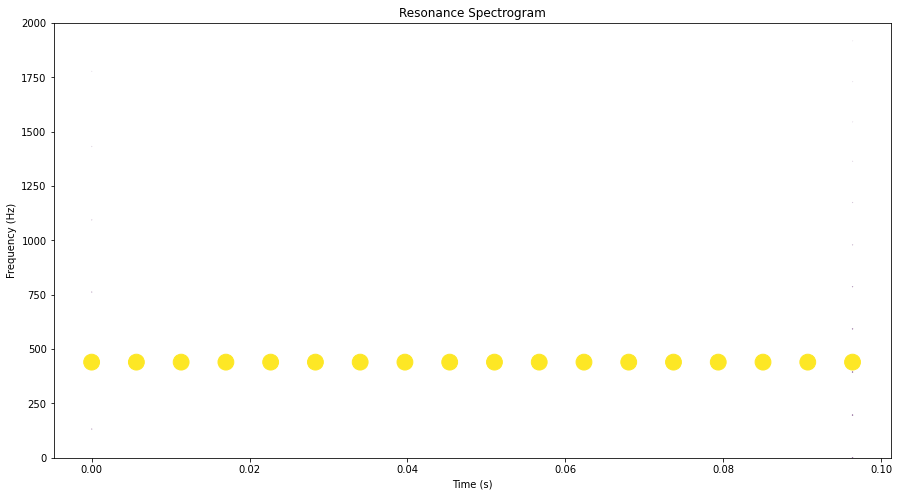

In [7]:
plot_spectrogram(spectrogram, max_freq = 2000, scale=100)

In [3]:
res_set = ResonanceSet(np.array([spectrogram]), np.array(spectrogram.onsets[0]))

# One resonance

fRes = res_set.elements[0][1].elements
candidateRes = res_set.elements[0][2].elements

# find a specific parameter
#res_set.elements[0][1].elements.d

#harmonic_mean_distance(res, candidates, forward, alpha=100, beta=1)
harmonic_mean_distance(fRes, candidateRes, True, alpha=100, beta=1)

#spectrogram.elements[0]

0.01029683311070756

## 3. Obtain the dynamic resonances

Next we obtain the dynamic resonances. The main parameter of this function is the distance measure. This parameter defines the formula used to calculate the distance (spectral similarity) between two resonances. We have developped six different distance measures:

    - Frequency distance.
    - Harmonic mean of the dk and wk coefficients.
    - Residue of the product of the resonances.
    - Residue of the product of the resonances weighted by power.
    - Residue of the product of the resonances multiplied by the spectra transference function.
    - Residue of the product of the resonances multiplied by the spectra transference function weighted by power.
    
In this example we use the Residue Power distance measure to obtain the dynamic resonances.

In [3]:
dyns = get_dynamic_resonances(spectrogram, min_overlap = 1e-15, overlap_type = "exponential", freq_ratio = 15, 
                              mode = 'forward', multiple_match = False, distance = 'residue_power')



Resonance(d=(1.1636518252571698e-06-0.4999054798583427j), w=(-2764.6012154032064+0.0008148624596355895j), z=(0.9980356833272399+0.06264831809987878j), N=250, sample_rate=44100)
Resonance(d=(0.017802200406665296+0.4995910706221063j), w=(-2764.601573443669-0.00011269635038215972j), z=(0.998035661826845+0.06264832488507496j), N=250, sample_rate=44100)
Resonance(d=(1.1636518252571698e-06+0.4999054798583427j), w=(2764.6012154032064+0.0008148624596355895j), z=(0.9980356833272399-0.06264831809987878j), N=250, sample_rate=44100)
Resonance(d=(0.017802200406665296-0.4995910706221063j), w=(2764.601573443669-0.00011269635038215972j), z=(0.998035661826845-0.06264832488507496j), N=250, sample_rate=44100)
Resonance(d=(0.017802200406665296-0.4995910706221063j), w=(2764.601573443669-0.00011269635038215972j), z=(0.998035661826845-0.06264832488507496j), N=250, sample_rate=44100)
Resonance(d=(-0.03558194737470503+0.49864049386197556j), w=(2764.601434243472+1.84297266334673e-05j), z=(0.998035664992132-0.06

Plot the dynamic resonances:

A
Resonance(d=(-4.8329368041734524e-05+2.0545714446678468e-05j), w=(135308.0628594861-126.28725140627513j), z=(-0.9944568399970264-0.07310711446002202j), N=250, sample_rate=44100)
--------------------
[ 21534.94704428 -21534.94704428  21293.68875029 -21293.68875029
  21929.38635744 -21929.38635744  20880.14766044 -20880.14766044
  20264.99498706 -20264.99498706  19904.94858816 -19904.94858816
  19524.21518447 -19524.21518447  19142.16462723 -19142.16462723
  18767.35860058 -18767.35860058  18432.33659826 -18432.33659826
  18052.87585442 -18052.87585442  17698.91336962 -17698.91336962
  17269.19726817 -17269.19726817  16848.55281461 -16848.55281461
  16334.13741337 -16334.13741337  16025.05120683 -16025.05120683
  15645.27287211 -15645.27287211  15046.60452154 -15046.60452154
  14821.45945357 -14821.45945357  14547.79799212 -14547.79799212
  14110.44256378 -14110.44256378  13777.56976847 -13777.56976847
  13486.30604699 -13486.30604699  13143.63198501 -13143.63198501
  12827.42637587 -1

IndexError: invalid index to scalar variable.

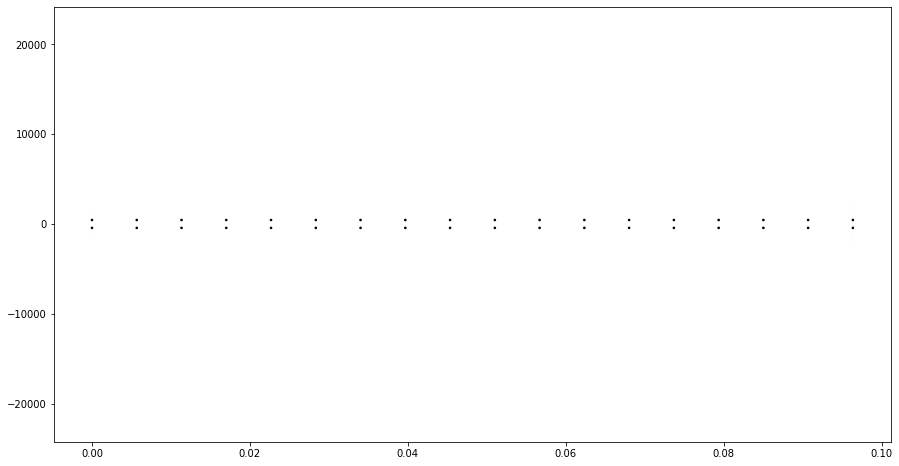

In [4]:
#dyns.elements

plot_dynamic(spectrogram, spectrogram, max_freq = 2000, size = 'power')

## 4. Extend dynamic resonances

Dynamic resonances can be extended with "correcting" resonances that reduce the discontinuitis in the recontruction at the edge of the windows. There exist three methods to extend dynamic resonances:

    - Extension by amplitude correction in the time signal
    - Extension by phase correction in the time signal
    - Extension by decay coefficient. The dynamic resonance is extended with all the resonances in the candidates 
    range that point inwards (damping above center resonance, ramping below center resonance) if the dynamic resonance is 
    decreasing in frequency and vice versa. 

In [ ]:
new_dyns = extend_dynamic_res(spectrogram, dyns, step_size = 250, extension_type = 'amplitude',  ratio = 1.3)

../resonance.py:298: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  els = np.array([store[el] for el in self._elements])


Plot the extended dynamic resonances

In [ ]:
plot_dynamic(spectrogram, new_dyns, max_freq = 2000, size = 'power')